In [2]:
from torch.utils.data import DataLoader
import sys
sys.path.append('/home/mei/nas/docker/thesis/model_train')
from dataloader.ts_reader import MultiModalDataset,VitalSignsDataset,vital_pre_train
from model.autoencoder_ts import RecurrentAutoencoder
from model.loss_ae import *
from plot_ae import *
import seaborn as sns
import matplotlib.pyplot as plt
import gc
gc.collect()

import torch
torch.cuda.empty_cache()

## overfit model

In [3]:

vital_signs_train = '/home/mei/nas/docker/thesis/data/hdf/train/ts_each_patient.h5'
vital_signs_val = '/home/mei/nas/docker/thesis/data/hdf/val/ts_each_patient.h5'
vital_signs_test = '/home/mei/nas/docker/thesis/data/hdf/test/ts_each_patient.h5'

train_dataset = VitalSignsDataset(vital_signs_train)
val_dataset = VitalSignsDataset(vital_signs_val)
test_dataset = VitalSignsDataset(vital_signs_test)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True, collate_fn=vital_pre_train)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False, collate_fn=vital_pre_train) 
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False, collate_fn=vital_pre_train)

In [4]:
from torch.utils.data import DataLoader, TensorDataset

small_data_iter = iter(train_loader) 
inputs, lengths = next(small_data_iter)  

small_dataset = TensorDataset(inputs, lengths)
small_train_loader = DataLoader(small_dataset, batch_size=len(inputs), shuffle=True) 

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

n_features = 154  
embedding_dim = 32
n_heads = 2
model = RecurrentAutoencoder(n_features, embedding_dim,n_heads).to(device)
som_layer = model.som


In [9]:
save_path = '/home/mei/nas/docker/thesis/data/model_results/pre_train/best_model_vp.pth'

model, history = train_model_som(model, train_loader, val_loader, n_epochs=100, save_path=save_path,device=device)

Epoch 10: train loss 4.2973 val loss 4.4839 use_som=False
Epoch 20: train loss 3.7956 val loss 3.9643 use_som=False
Epoch 30: train loss 3.4456 val loss 3.5481 use_som=False
Epoch 40: train loss 3.3638 val loss 3.5657 use_som=True
Epoch 50: train loss 3.0387 val loss 3.3798 use_som=True
Epoch 60: train loss 2.8084 val loss 3.1075 use_som=True
Epoch 70: train loss 2.7359 val loss 2.8792 use_som=True
Epoch 80: train loss 2.6354 val loss 2.7957 use_som=True
Epoch 90: train loss 2.5714 val loss 2.8009 use_som=True
Epoch 100: train loss 2.5030 val loss 2.7035 use_som=True


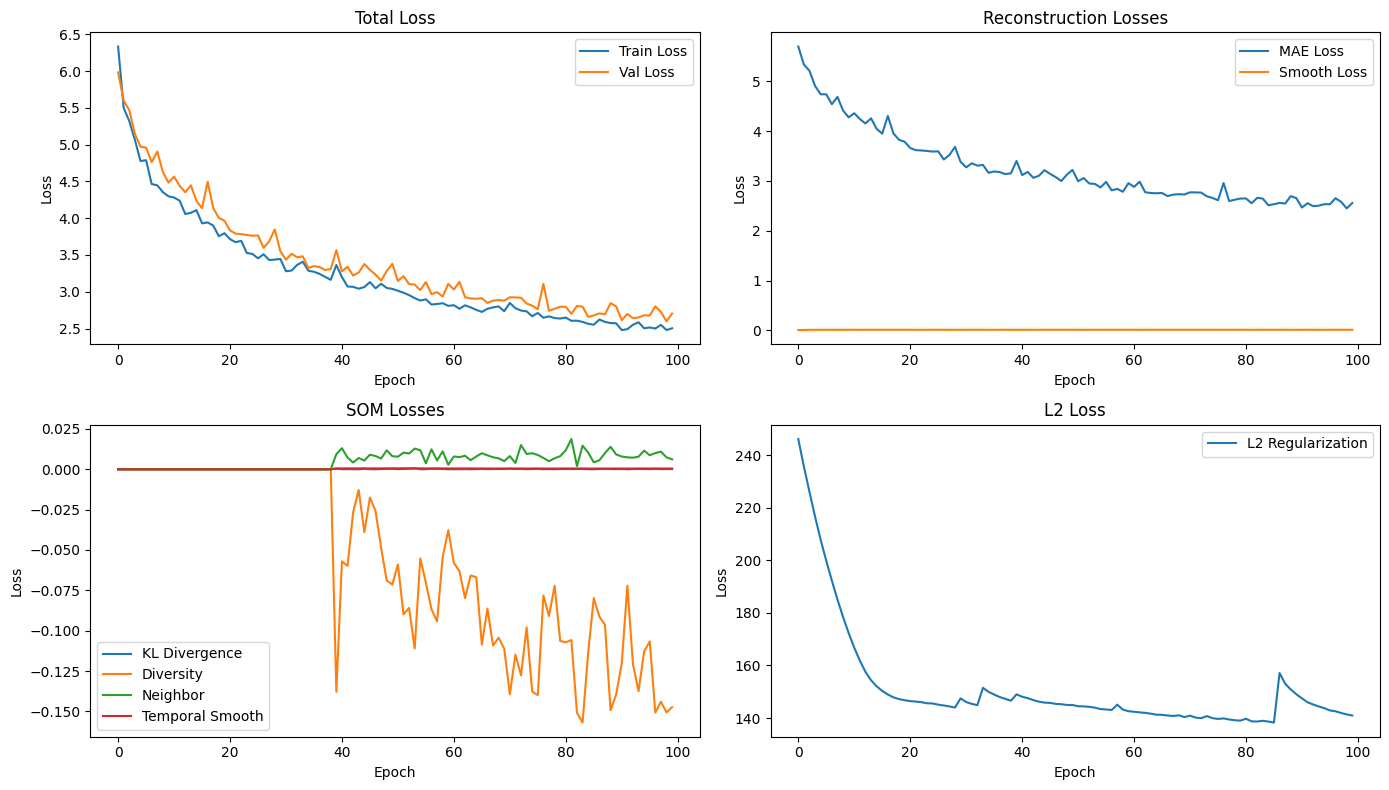

In [10]:
plot_training_history(history)

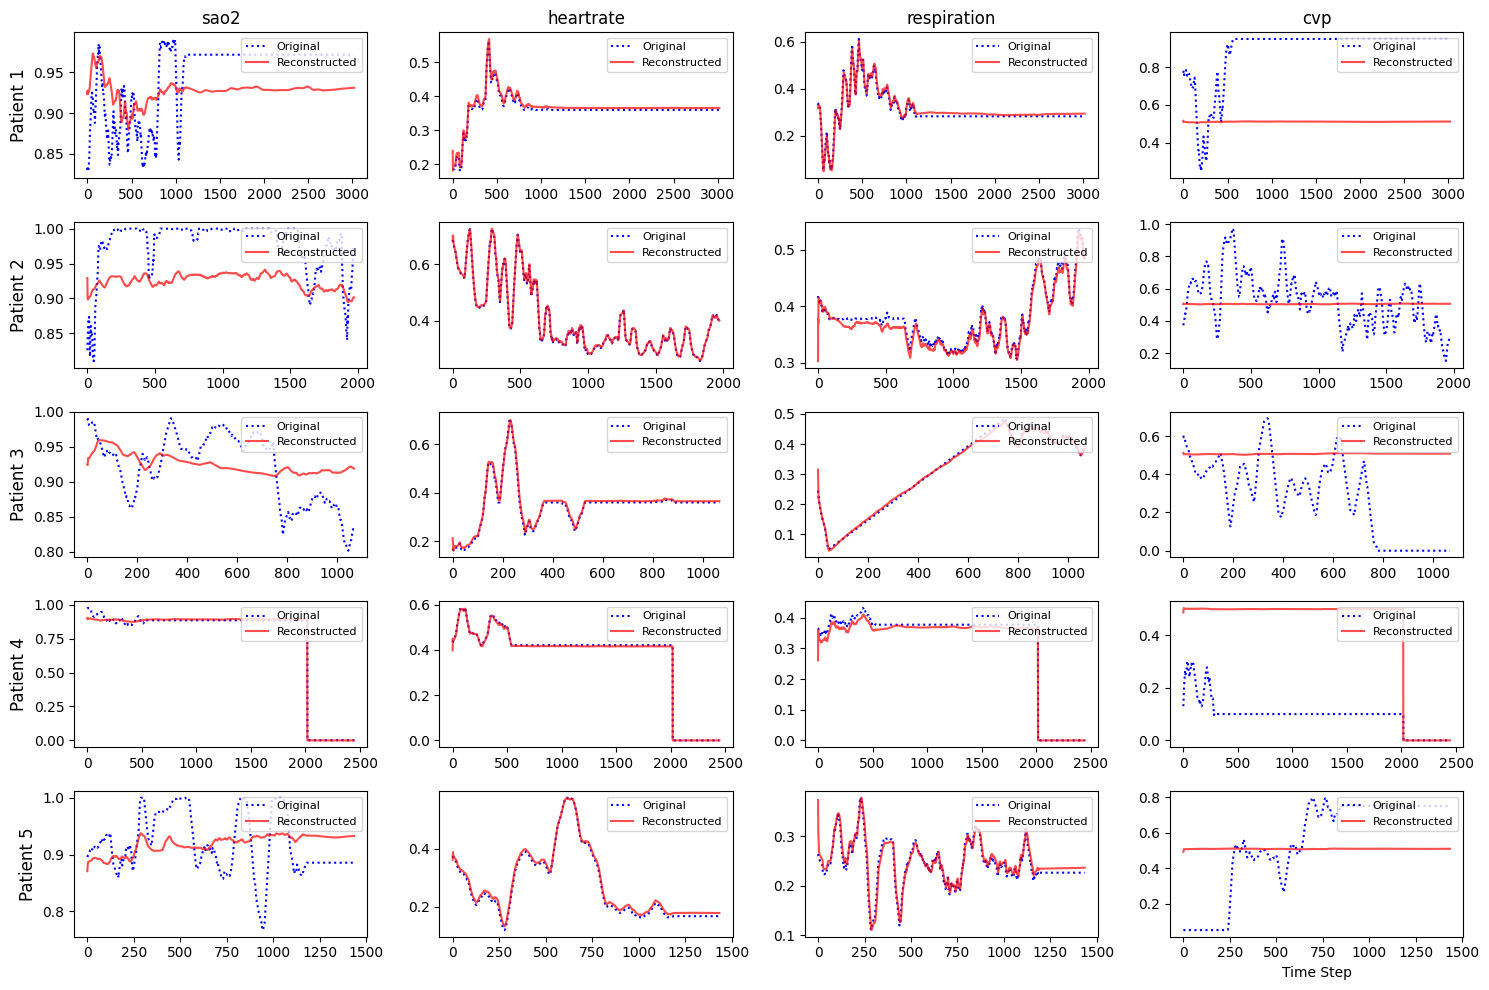

In [11]:
with open('/home/mei/nas/docker/thesis/data/hdf/features.txt', 'r') as f:
    features = [line.strip() for line in f]

selected_feature_indices = [144,145,146,147]  # 
visualize_recons(model, test_loader, num_patients=5, feature_indices=selected_feature_indices, feature_names=features,device=device)

In [2]:

vital_signs_train = '/home/mei/nas/docker/thesis/data/ts/vital_signs_train.h5'
vital_signs_val = '/home/mei/nas/docker/thesis/data/ts/vital_signs_val.h5'
vital_signs_test = '/home/mei/nas/docker/thesis/data/ts/vital_signs_test.h5'

train_dataset = VitalSignsDataset(vital_signs_train)
val_dataset = VitalSignsDataset(vital_signs_val)
test_dataset = VitalSignsDataset(vital_signs_test)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True, collate_fn=vital_pre_train)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False, collate_fn=vital_pre_train) 
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False, collate_fn=vital_pre_train)

In [3]:
from torch.utils.data import DataLoader, TensorDataset

small_data_iter = iter(train_loader) 
inputs, lengths = next(small_data_iter)  
inputs = inputs[:,:,1:]  # Remove the first feature (index 0)
small_dataset = TensorDataset(inputs, lengths)
small_train_loader_ts = DataLoader(small_dataset, batch_size=len(inputs), shuffle=True)


In [8]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

n_features = 11  
embedding_dim =12
n_heads = 2
model_ts = RecurrentAutoencoder(n_features, embedding_dim,n_heads).to(device)


In [9]:
save_path = '/home/mei/nas/docker/thesis/data/model_results/pre_train/best_model_vp.pth'

model_ts, history_ts = train_model_som(model_ts, small_train_loader_ts , small_train_loader_ts , n_epochs=500, save_path=save_path,device=device)

Epoch 10: train loss 5.0394 val loss 4.8831 use_som=False
Epoch 20: train loss 4.2418 val loss 4.2035 use_som=False
Epoch 30: train loss 3.8871 val loss 3.8528 use_som=False
Epoch 40: train loss 3.8468 val loss 3.8250 use_som=True
Epoch 50: train loss 3.6181 val loss 3.5948 use_som=True
Epoch 60: train loss 3.3307 val loss 3.2976 use_som=True
Epoch 70: train loss 2.9578 val loss 2.9170 use_som=True
Epoch 80: train loss 2.6232 val loss 2.5850 use_som=True
Epoch 90: train loss 2.2229 val loss 2.1932 use_som=True
Epoch 100: train loss 1.9707 val loss 1.9399 use_som=True
Epoch 110: train loss 1.6321 val loss 1.5942 use_som=True
Epoch 120: train loss 1.2888 val loss 1.2573 use_som=True
Epoch 130: train loss 1.0565 val loss 1.0353 use_som=True
Epoch 140: train loss 0.9249 val loss 0.9176 use_som=True
Epoch 150: train loss 0.8653 val loss 0.8606 use_som=True
Epoch 160: train loss 0.8319 val loss 0.8295 use_som=True
Epoch 170: train loss 0.8122 val loss 0.8123 use_som=True
Epoch 180: train los

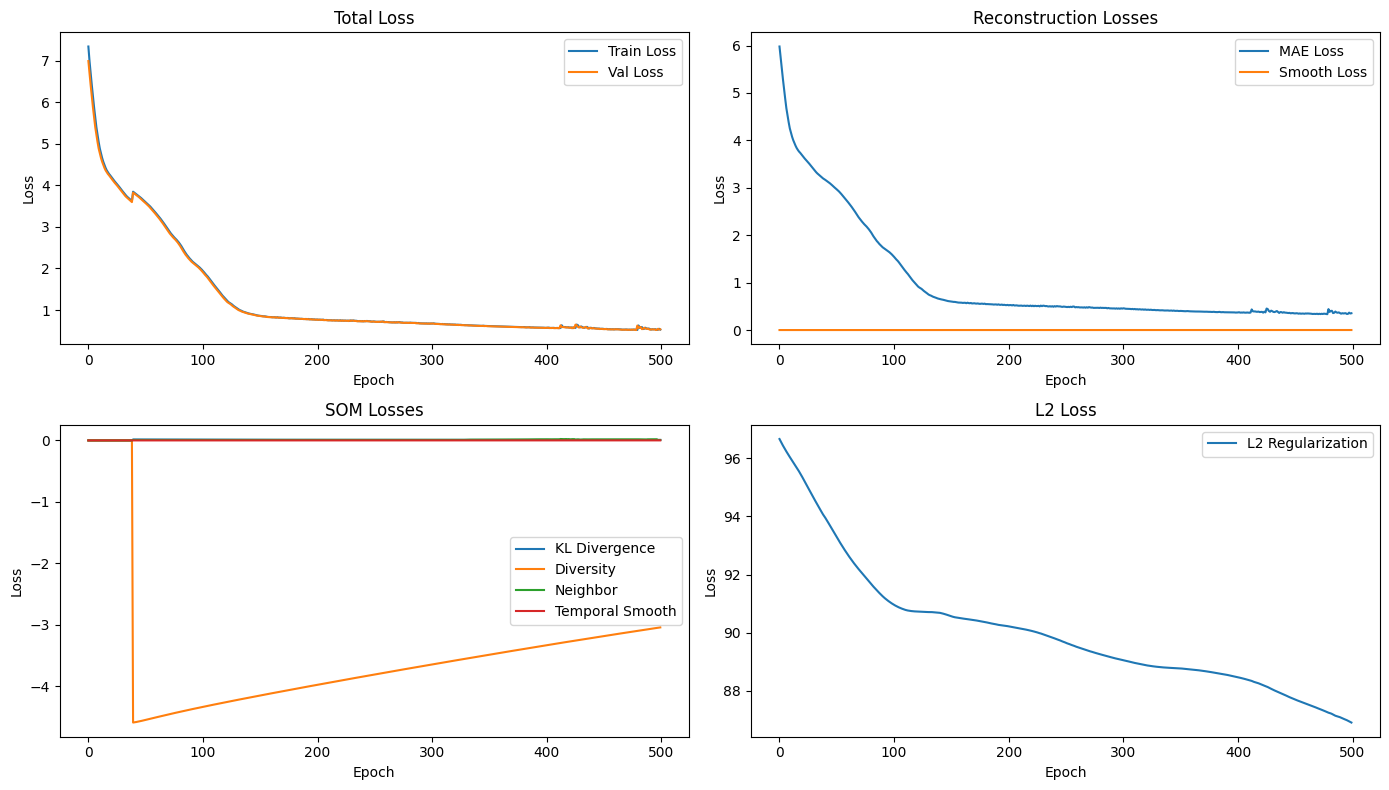

In [10]:
## em = 12 ，som =true
plot_training_history(history_ts)

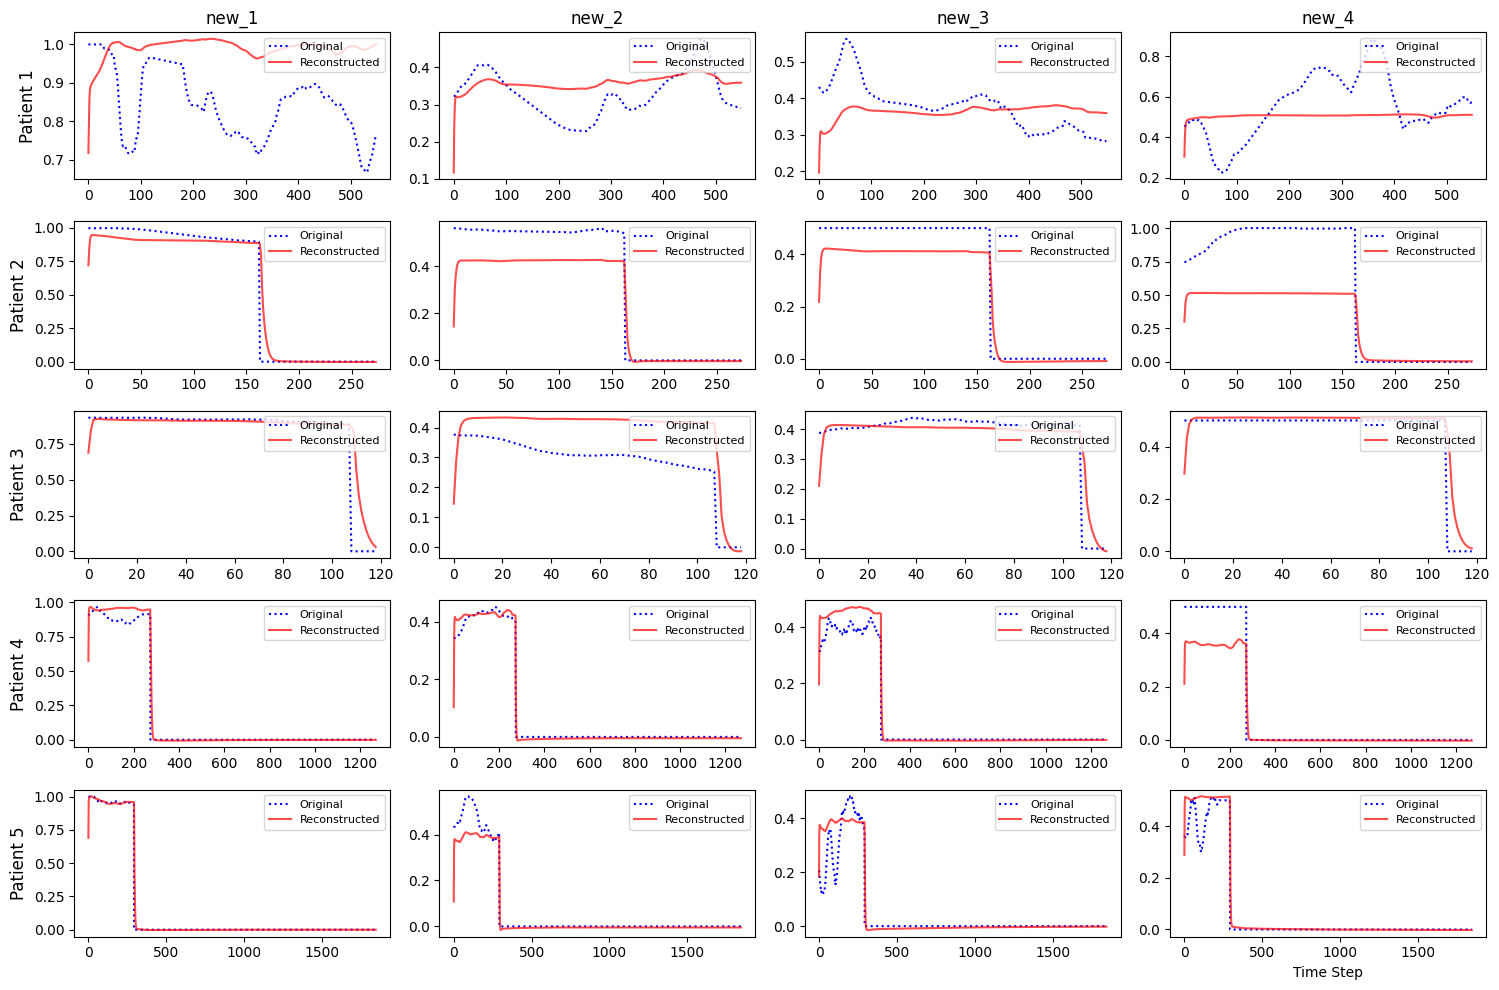

In [11]:
with open('/home/mei/nas/docker/thesis/data/hdf/features.txt', 'r') as f:
    features = [line.strip() for line in f]
    features = features[143:]
    features = [f"new_{i}" for i, feat in enumerate(features)] 
selected_feature_indices = [1,2,3,4]  # 
visualize_recons(model_ts, small_train_loader_ts, num_patients=5, feature_indices=selected_feature_indices, feature_names=features,device=device)

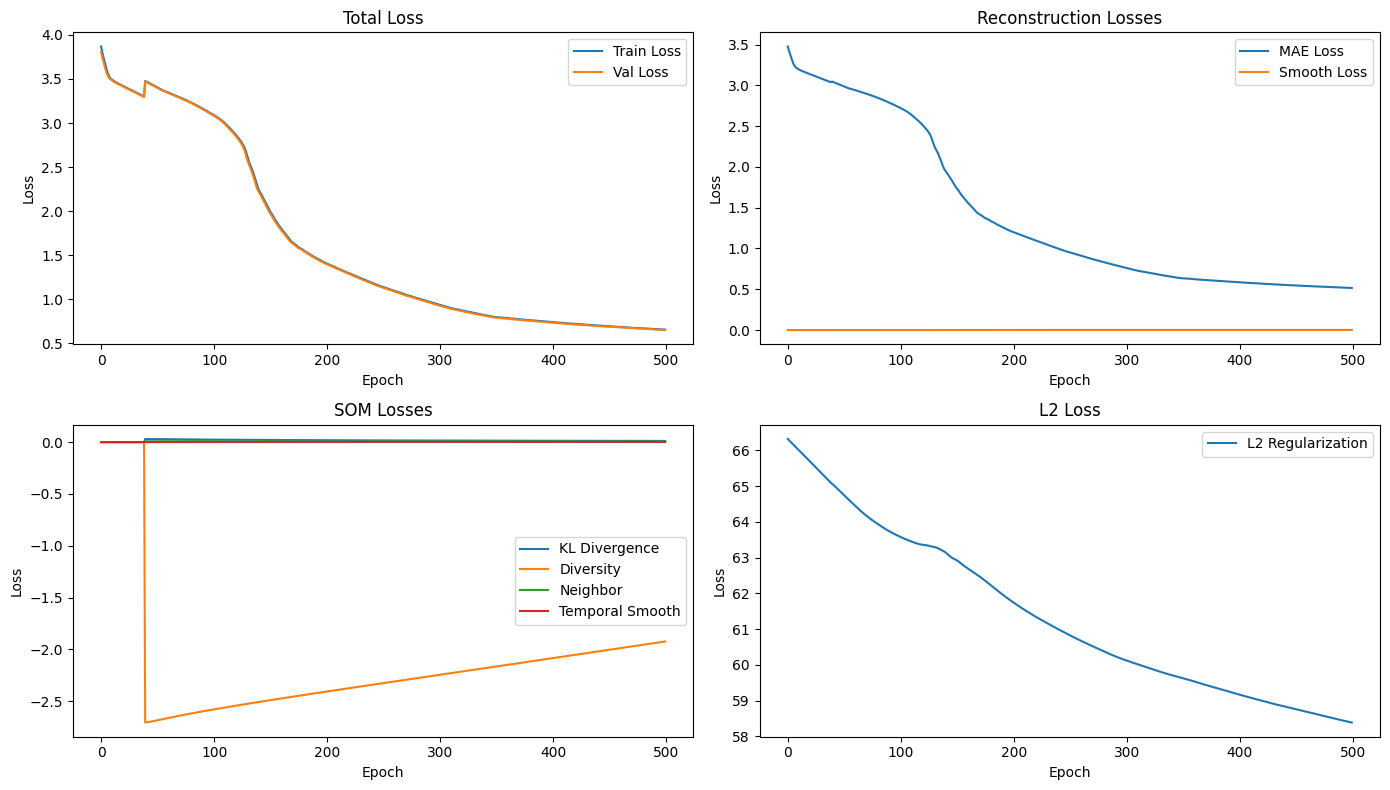

In [6]:
## em = 4 ，som =true
plot_training_history(history_ts)

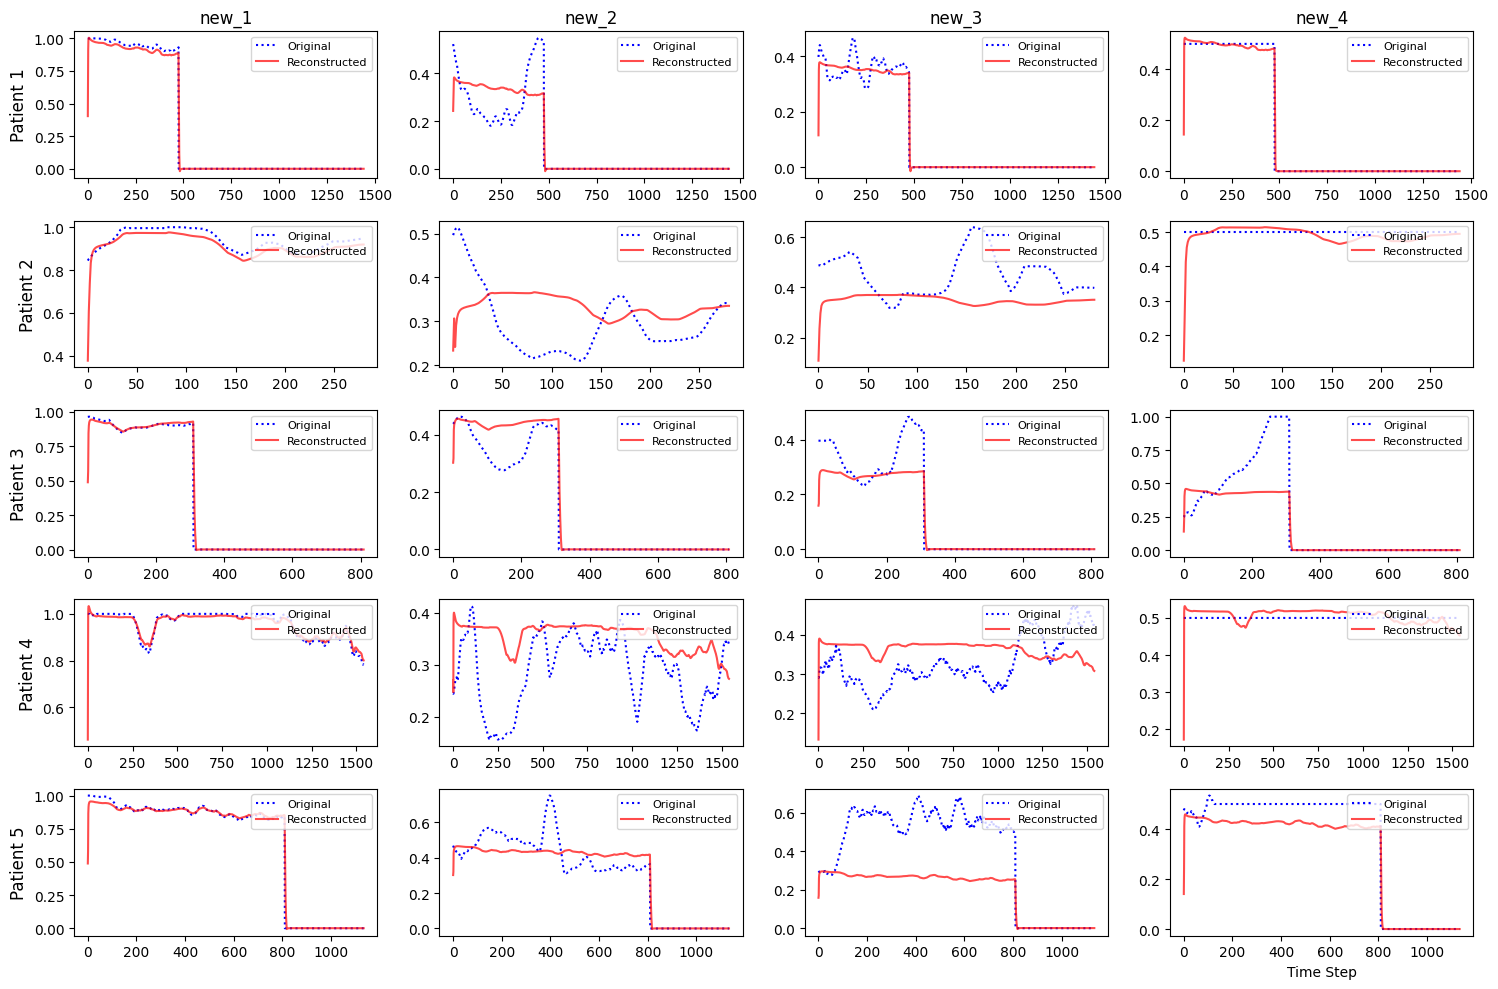

In [7]:
with open('/home/mei/nas/docker/thesis/data/hdf/features.txt', 'r') as f:
    features = [line.strip() for line in f]
    features = features[143:]
    features = [f"new_{i}" for i, feat in enumerate(features)] 
selected_feature_indices = [1,2,3,4]  # 
visualize_recons(model_ts, small_train_loader_ts, num_patients=5, feature_indices=selected_feature_indices, feature_names=features,device=device)

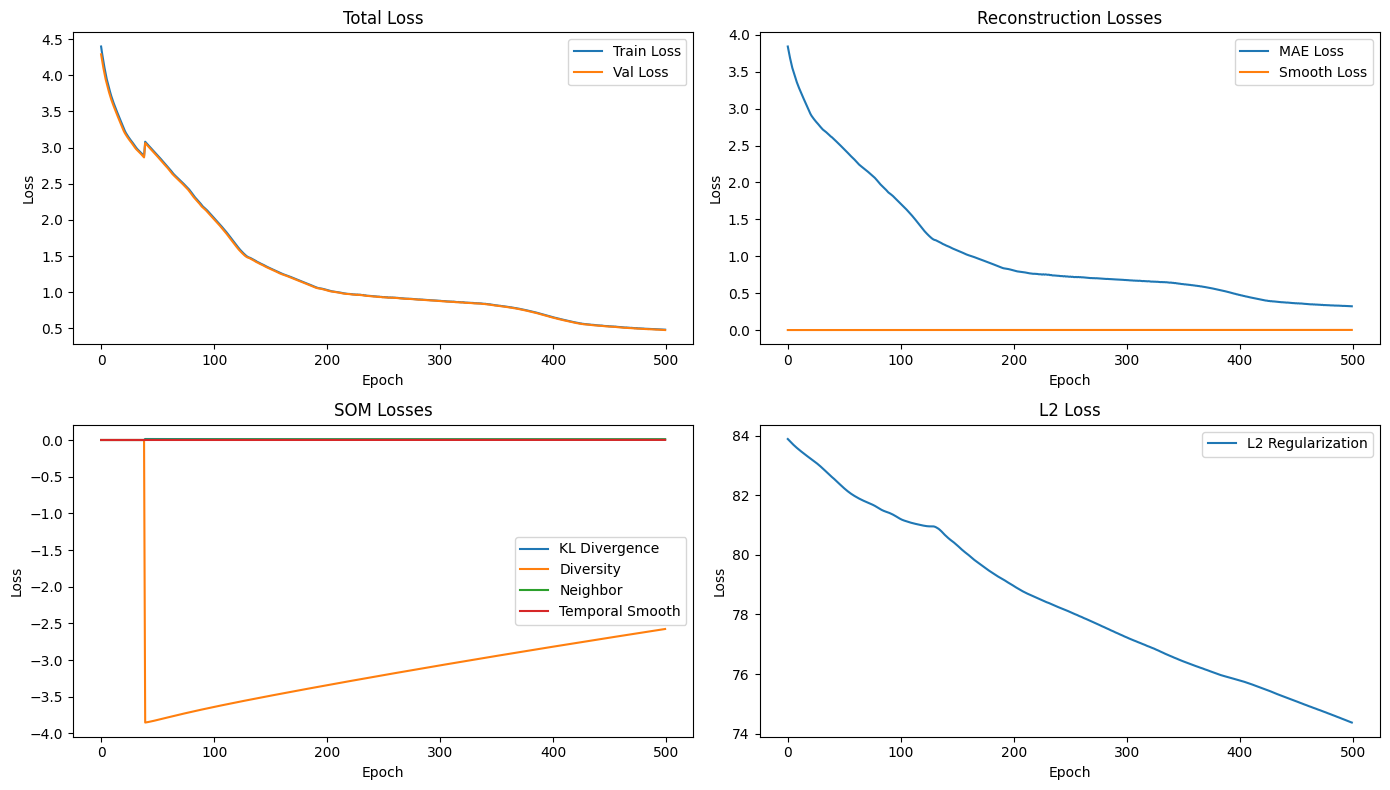

In [6]:
## em = 8 ，som =true
plot_training_history(history_ts)

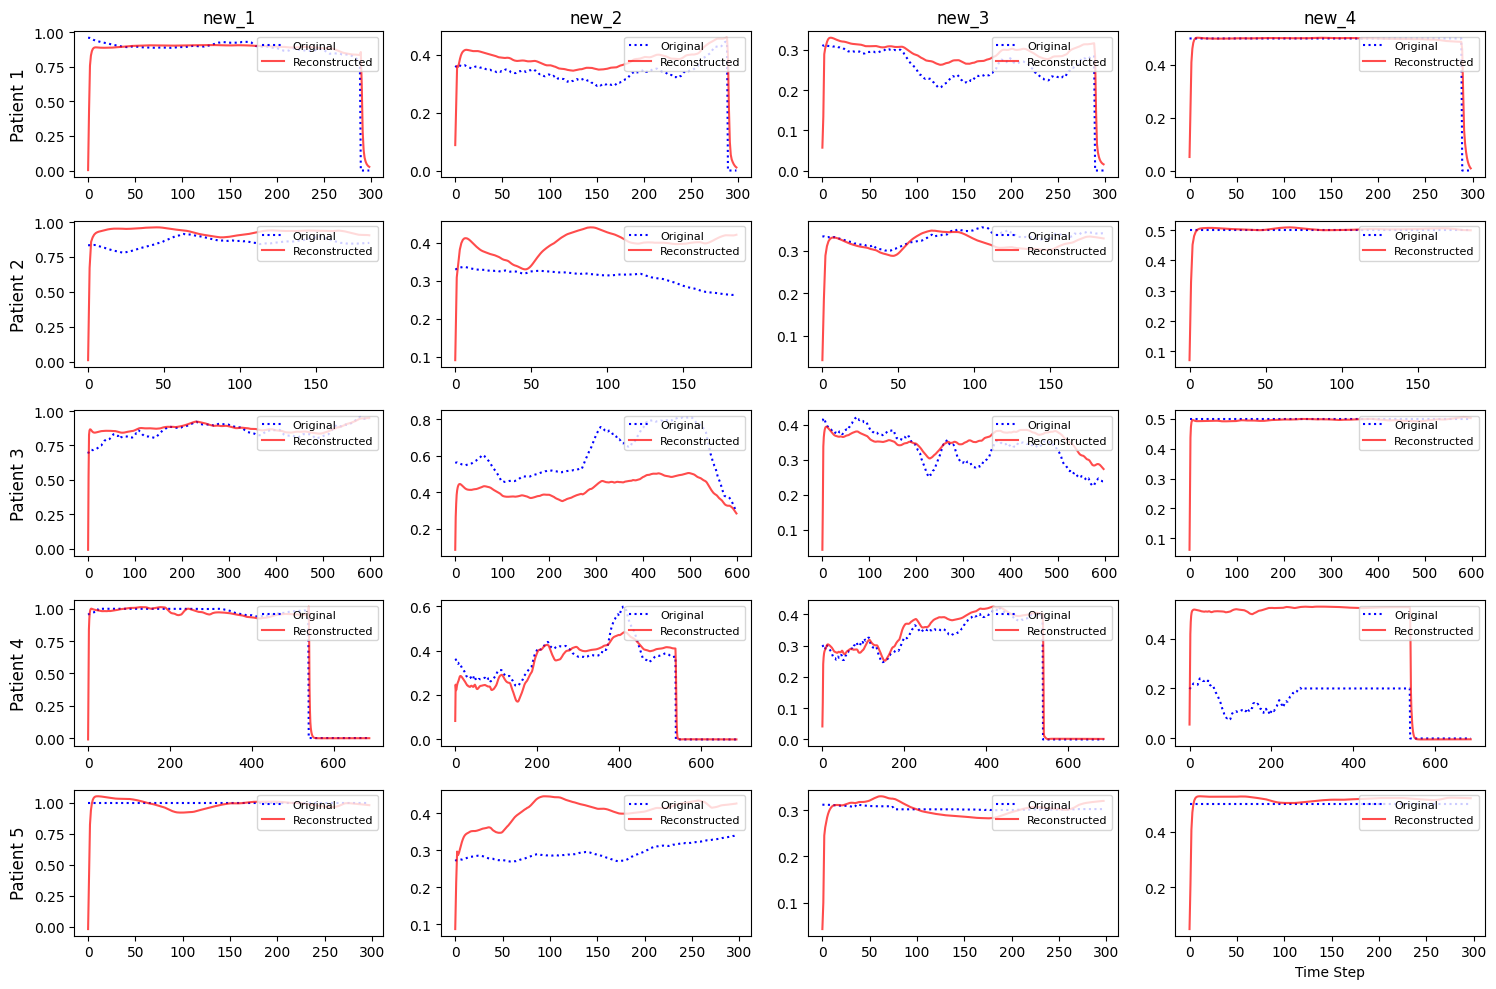

In [7]:
with open('/home/mei/nas/docker/thesis/data/hdf/features.txt', 'r') as f:
    features = [line.strip() for line in f]
    features = features[143:]
    features = [f"new_{i}" for i, feat in enumerate(features)] 
selected_feature_indices = [1,2,3,4]  # 
visualize_recons(model_ts, small_train_loader_ts, num_patients=5, feature_indices=selected_feature_indices, feature_names=features,device=device)

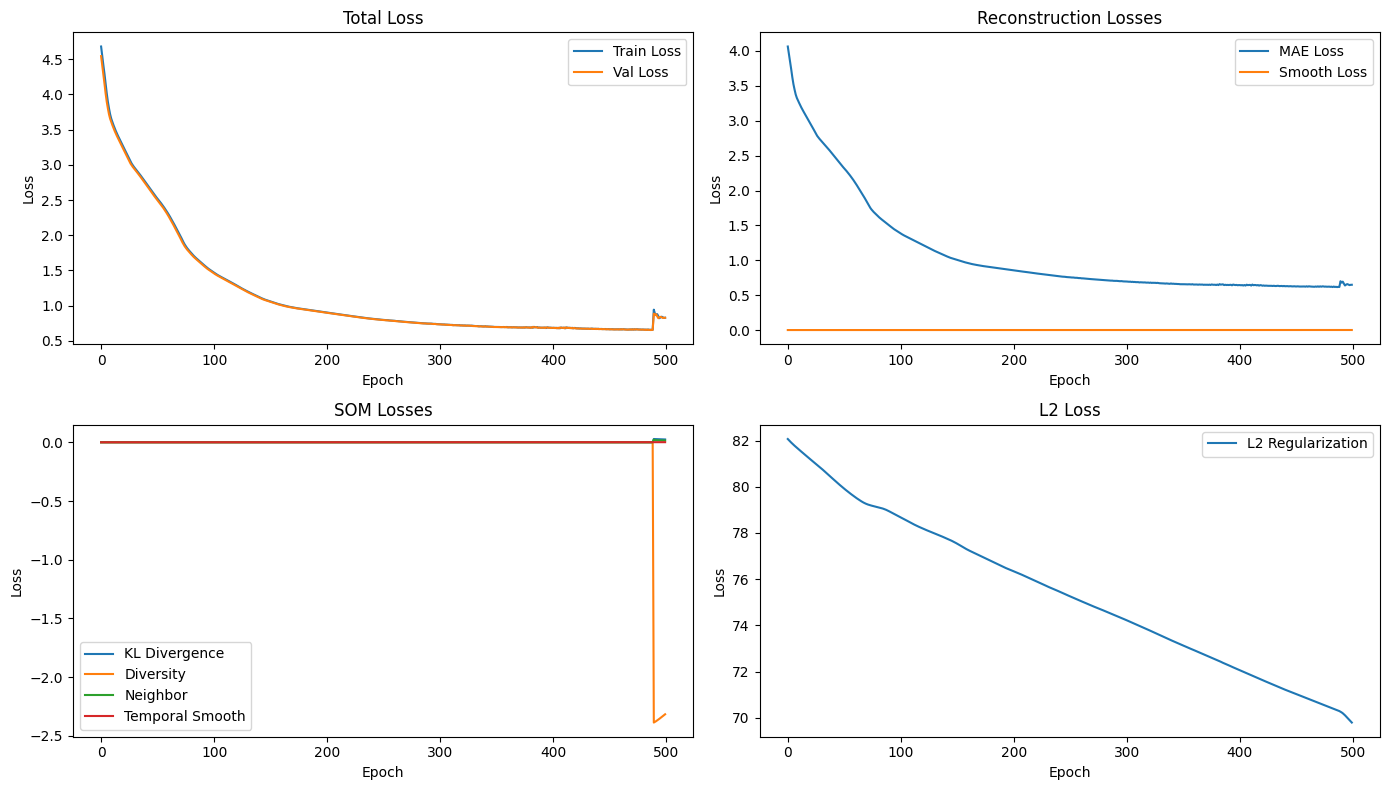

In [6]:
## em = 8 ，som =false
plot_training_history(history_ts)

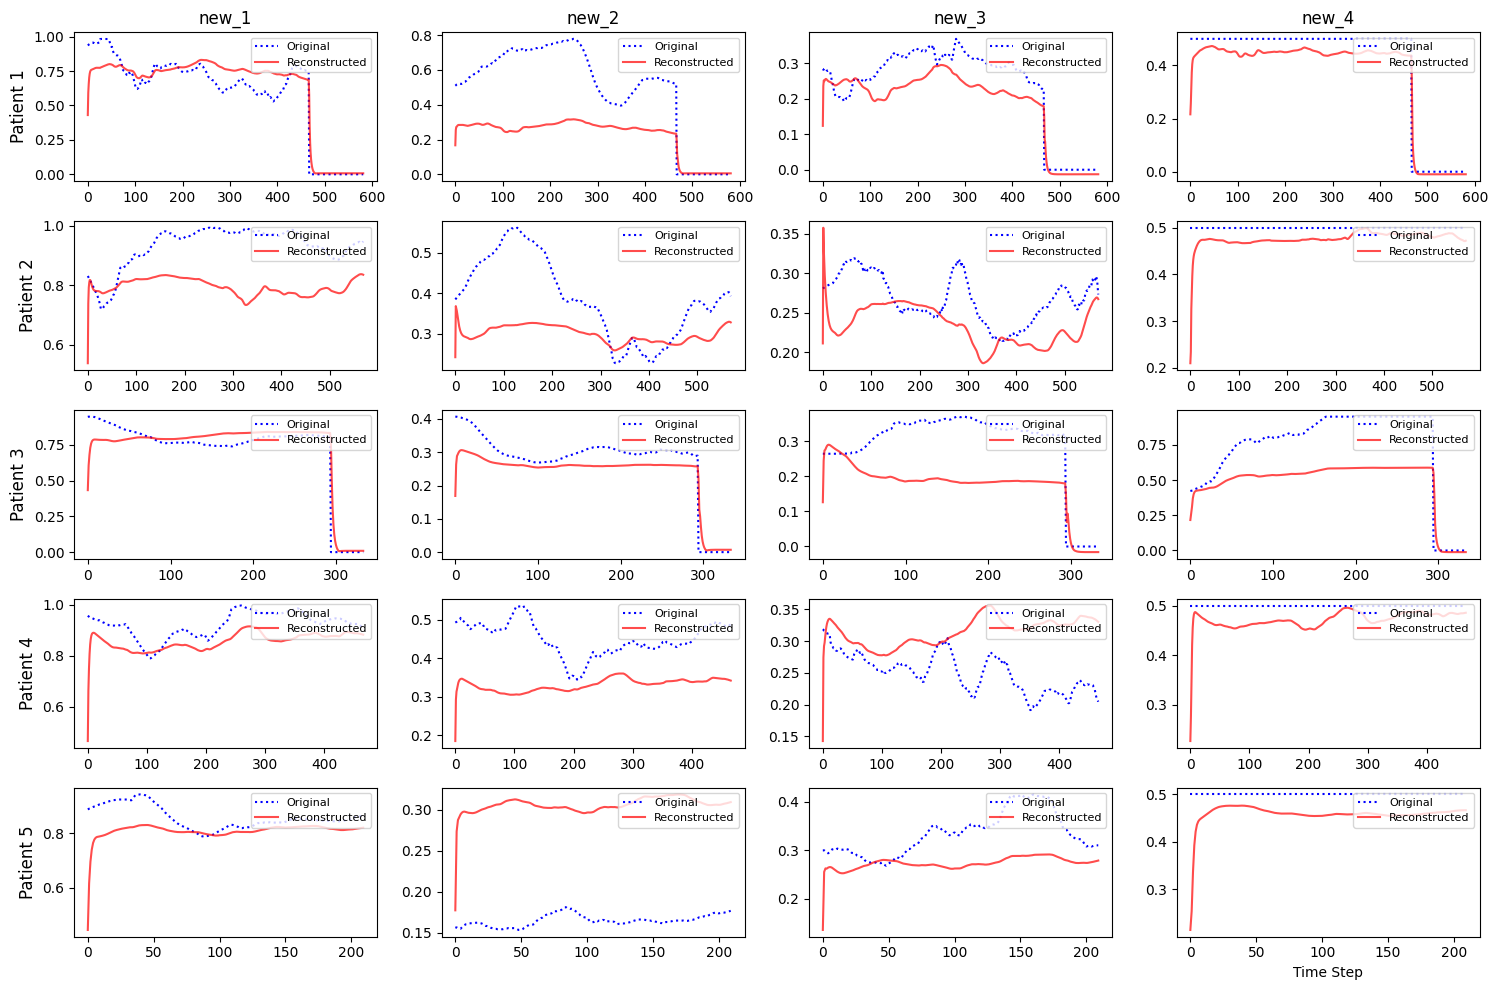

In [7]:
with open('/home/mei/nas/docker/thesis/data/hdf/features.txt', 'r') as f:
    features = [line.strip() for line in f]
    features = features[143:]
    features = [f"new_{i}" for i, feat in enumerate(features)] 
selected_feature_indices = [1,2,3,4]  # 
visualize_recons(model_ts, small_train_loader_ts, num_patients=5, feature_indices=selected_feature_indices, feature_names=features,device=device)

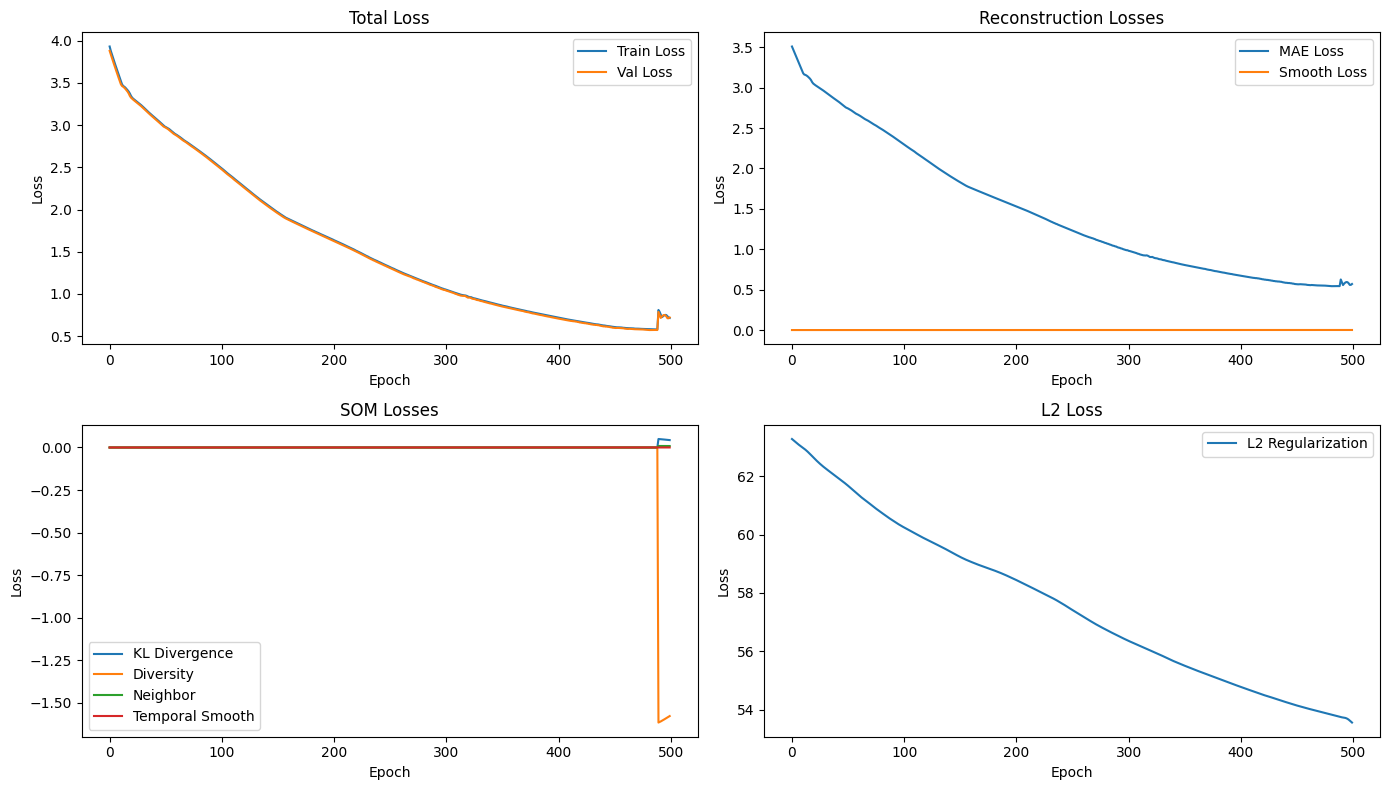

In [ ]:
## em = 4 ,som=false
plot_training_history(history_ts)

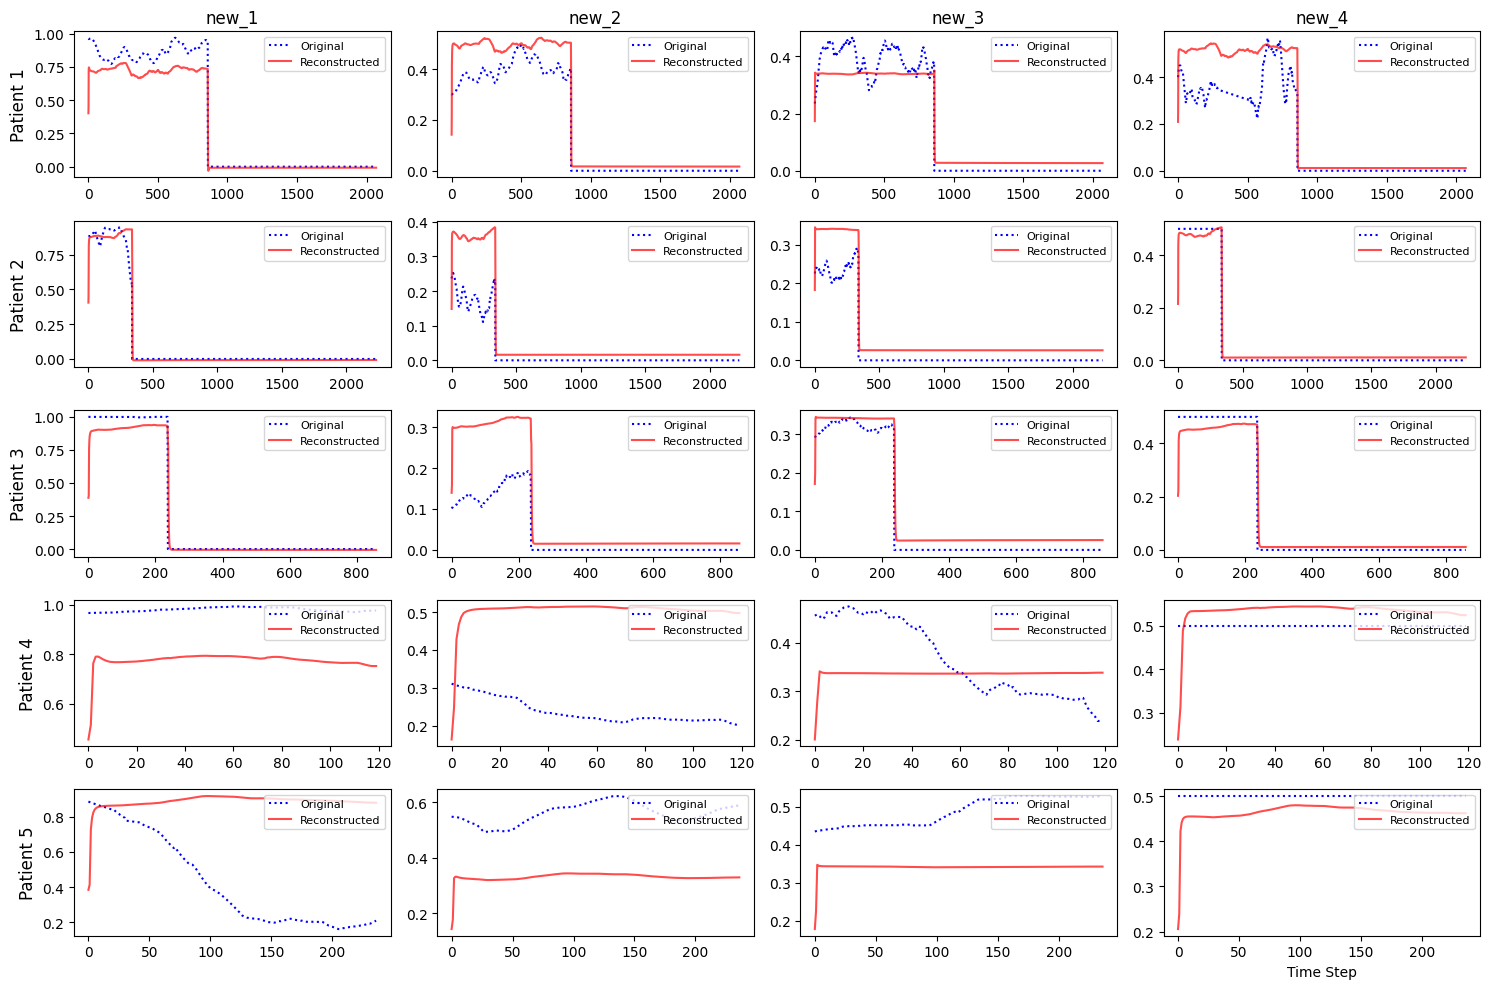

In [8]:
with open('/home/mei/nas/docker/thesis/data/hdf/features.txt', 'r') as f:
    features = [line.strip() for line in f]
    features = features[143:]
    features = [f"new_{i}" for i, feat in enumerate(features)] 
selected_feature_indices = [1,2,3,4]  # 
visualize_recons(model_ts, small_train_loader_ts, num_patients=5, feature_indices=selected_feature_indices, feature_names=features,device=device)

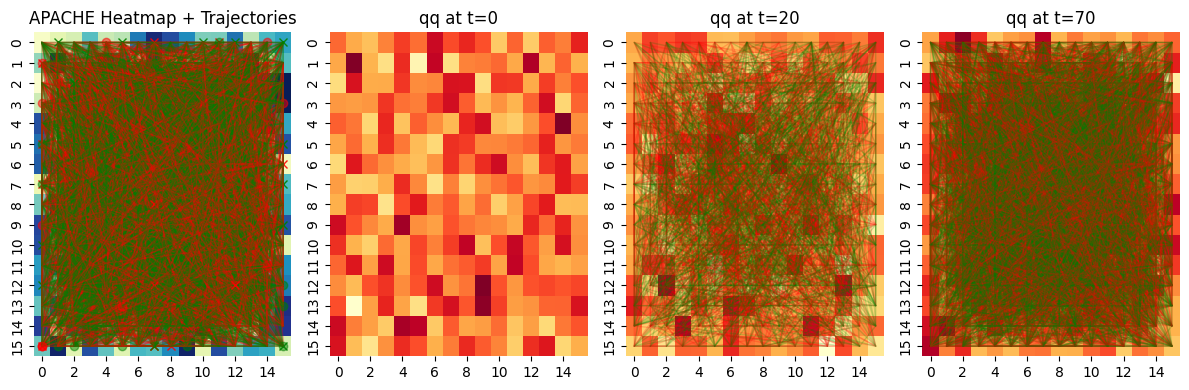

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set random seed for reproducibility
np.random.seed(42)

# Mock data
som_dim = (16, 16)
sd = som_dim[0] * som_dim[1]
num_samples = 100
timesteps = 80

# Trajectory positions (k_all): integers in [0, sd)
k_all = np.random.randint(0, sd, size=(num_samples, timesteps))

# Soft assignments (qq): [num_samples, timesteps, sd]
qq = np.random.rand(num_samples, timesteps, sd)
qq /= qq.sum(axis=-1, keepdims=True)  # Normalize

# Labels: 0 = survived (green), 1 = died (red)
labels_val_all = np.random.randint(0, 2, size=(num_samples,))

# APACHE-like clust_matr1 for left heatmap
clust_matr1 = np.random.rand(sd)
clust_matr1_reshaped = clust_matr1.reshape(som_dim)

# Coordinate helpers
def get_coords(indices):
    return np.array([(i // som_dim[1], i % som_dim[1]) for i in indices])

# Create the figure
fig = plt.figure(figsize=(12, 4))

# --- Left: Main heatmap with trajectories ---
ax1 = fig.add_subplot(1, 4, 1)
sns.heatmap(clust_matr1_reshaped, ax=ax1, cmap="YlGnBu", cbar=False)
ax1.set_title("APACHE Heatmap + Trajectories")

# Overlay trajectories
for i in range(num_samples):
    coords = get_coords(k_all[i])
    color = 'green' if labels_val_all[i] == 0 else 'red'
    ax1.plot(coords[:, 1] + 0.5, coords[:, 0] + 0.5, color=color, alpha=0.3, linewidth=1)
    ax1.plot(coords[0, 1] + 0.5, coords[0, 0] + 0.5, 'o', color=color, alpha=0.5)  # start
    ax1.plot(coords[-1, 1] + 0.5, coords[-1, 0] + 0.5, 'x', color=color, alpha=0.9)  # end

# --- Right: qq snapshots at time 0, 20, 70 ---
for j, t in enumerate([0, 20, 70]):
    ax = fig.add_subplot(1, 4, j + 2)
    mean_qq_t = qq[:, t, :].mean(axis=0).reshape(som_dim)
    sns.heatmap(mean_qq_t, ax=ax, cmap="YlOrRd", cbar=False)
    ax.set_title(f"qq at t={t}")

    # Overlay truncated trajectories up to time t
    for i in range(num_samples):
        coords = get_coords(k_all[i, :t+1])
        color = 'green' if labels_val_all[i] == 0 else 'red'
        ax.plot(coords[:, 1] + 0.5, coords[:, 0] + 0.5, color=color, alpha=0.2, linewidth=1)

plt.tight_layout()
plt.show()
